<a href="https://colab.research.google.com/github/madhurapi/Green-Energy-Demand-Forecast/blob/main/Green_Energy_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import 'Numpy' 
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

In [ ]:
file = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Green energy Forecasting/train_IxoE5JN.csv")
df = pd.DataFrame(file)

In [ ]:
df.shape

(94992, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [ ]:
df['datetime']= pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [ ]:
for d in df['datetime']:
   df['date'] = d.date()
   df['time'] = d.time()

In [ ]:
df.head()

,row_id,datetime,energy,date,time
0,1,2008-03-01 00:00:00,1259.985563,2018-12-31,23:00:00
1,2,2008-03-01 01:00:00,1095.541500,2018-12-31,23:00:00
2,3,2008-03-01 02:00:00,1056.247500,2018-12-31,23:00:00
3,4,2008-03-01 03:00:00,1034.742000,2018-12-31,23:00:00
4,5,2008-03-01 04:00:00,1026.334500,2018-12-31,23:00:00


In [ ]:
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month

In [ ]:
df.head()

,row_id,datetime,energy,date,time,year,month
0,1,2008-03-01 00:00:00,1259.985563,2018-12-31,23:00:00,2008,3
1,2,2008-03-01 01:00:00,1095.541500,2018-12-31,23:00:00,2008,3
2,3,2008-03-01 02:00:00,1056.247500,2018-12-31,23:00:00,2008,3
3,4,2008-03-01 03:00:00,1034.742000,2018-12-31,23:00:00,2008,3
4,5,2008-03-01 04:00:00,1026.334500,2018-12-31,23:00:00,2008,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
 3   date      94992 non-null  object        
 4   time      94992 non-null  object        
 5   year      94992 non-null  int64         
 6   month     94992 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.1+ MB


In [ ]:
df['date']= pd.to_datetime(df['date'])

In [ ]:
df.describe()

,row_id,energy,year,month
count,94992.000000,93092.000000,94992.000000,94992.000000
mean,47496.500000,1702.995014,2013.075038,6.599040
std,27421.972723,369.322103,3.125436,3.417591
min,1.000000,866.388600,2008.000000,1.000000
25%,23748.750000,1431.541100,2010.000000,4.000000
50%,47496.500000,1654.465800,2013.000000,7.000000
75%,71244.250000,1935.993450,2016.000000,10.000000
max,94992.000000,3374.399600,2018.000000,12.000000


In [ ]:
df.isnull().sum()

row_id         0
datetime       0
energy      1900
date           0
time           0
year           0
month          0
dtype: int64

In [ ]:
pivot_1 = df.pivot_table(index =['year'],
                       values =['energy'],
                       aggfunc ='count')
pivot_1

,energy
year,
2008,7208
2009,8594
2010,8575
2011,8603
2012,8595
2013,8590
2014,8590
2015,8579
2016,8597


In [ ]:
pivot_2 = df.pivot_table(index =['year'],
                       values =['energy'],
                       aggfunc ='mean')
pivot_2

,energy
year,
2008,1377.916409
2009,1462.236376
2010,1439.590730
2011,1493.031151
2012,1575.577668
2013,1638.486142
2014,1870.370032
2015,1906.806121
2016,1908.971338


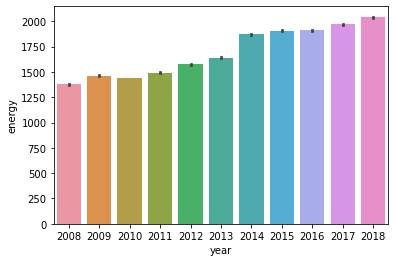

In [ ]:
sns.barplot(x ='year',y = 'energy', data = df)

In [ ]:
df['energy'].fillna((1702.995014), inplace=True)

In [ ]:
df.isnull().sum()

row_id      0
datetime    0
energy      0
date        0
time        0
year        0
month       0
dtype: int64

In [ ]:
df.head()

,row_id,datetime,energy,date,time,year,month
0,1,2008-03-01 00:00:00,1259.985563,2018-12-31,23:00:00,2008,3
1,2,2008-03-01 01:00:00,1095.541500,2018-12-31,23:00:00,2008,3
2,3,2008-03-01 02:00:00,1056.247500,2018-12-31,23:00:00,2008,3
3,4,2008-03-01 03:00:00,1034.742000,2018-12-31,23:00:00,2008,3
4,5,2008-03-01 04:00:00,1026.334500,2018-12-31,23:00:00,2008,3


In [ ]:
df_energy = df[['energy']]

In [ ]:
df_energy

,energy
0,1259.985563
1,1095.541500
2,1056.247500
3,1034.742000
4,1026.334500
...,...
94987,2528.446800
94988,2461.883600
94989,2365.994400
94990,2342.942800


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df_energy)
robust_df = pd.DataFrame(robust_df, columns =['energy'])

In [ ]:
robust_df

,energy
0,-0.819501
1,-1.152542
2,-1.232123
3,-1.275677
4,-1.292704
...,...
94987,1.749461
94988,1.614653
94989,1.420453
94990,1.373768


In [ ]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_energy)
standard_df = pd.DataFrame(standard_df, columns =['energy'])

In [ ]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_energy)
minmax_df = pd.DataFrame(minmax_df, columns =['energy'])

In [ ]:
df1 = df.copy(deep =True)

In [ ]:
df1.drop(['energy'],axis = 1 , inplace = True)

In [ ]:
df2 = pd.concat((df1,robust_df),axis = 1)
df2.head()

,row_id,datetime,date,time,year,month,energy
0,1,2008-03-01 00:00:00,2018-12-31,23:00:00,2008,3,-0.819501
1,2,2008-03-01 01:00:00,2018-12-31,23:00:00,2008,3,-1.152542
2,3,2008-03-01 02:00:00,2018-12-31,23:00:00,2008,3,-1.232123
3,4,2008-03-01 03:00:00,2018-12-31,23:00:00,2008,3,-1.275677
4,5,2008-03-01 04:00:00,2018-12-31,23:00:00,2008,3,-1.292704


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   date      94992 non-null  datetime64[ns]
 3   time      94992 non-null  object        
 4   year      94992 non-null  int64         
 5   month     94992 non-null  int64         
 6   energy    94992 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 5.1+ MB


In [ ]:
X = df2.iloc[:,[4,5]]
y = df2.iloc[:,6]
print(y)
print(X.info())

0       -0.819501
1       -1.152542
2       -1.232123
3       -1.275677
4       -1.292704
           ...   
94987    1.749461
94988    1.614653
94989    1.420453
94990    1.373768
94991    1.044207
Name: energy, Length: 94992, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    94992 non-null  int64
 1   month   94992 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB
None


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
y_pred_rf_train = rf.predict(X_train)

In [ ]:
from sklearn import metrics
print('R Square:',rf.score(X_test, y_test))
print('RMSE:', 100*np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

R Square: 0.5822297699058862
RMSE: 47.74773850487783


In [ ]:
print('R Square:',rf.score(X_train, y_train))
print('RMSE:', 100*np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf_train)))

R Square: 0.5858978550915747
RMSE: 47.6959221900392


In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [5,8,10] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
rf_random1 = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


rf_random1.fit(X_train, y_train)
#predictions
y_pred_rf = rf.predict(X_test)
#test score
print('R Square_test:',rf.score(X_test, y_test))
print('RMSE test:', 100*np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
#train_predictions
y_pred_rf_train = rf.predict(X_train)

print('R Square_train:',rf.score(X_train, y_train))
print('RMSE_train:', 100*np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf_train)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
R Square_test: 0.5822297699058862
RMSE test: 47.74773850487783
R Square_train: 0.5858978550915747
RMSE_train: 47.6959221900392


In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(max_depth = 7,
                  n_estimators = 10, seed = 123)
# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
pred_xg = xgb_r.predict(X_test)

# # RMSE Computation
# rmse = np.sqrt(mean_squared_error(y_test, pred_xg))
# print("RMSE : % f" %(rmse))

print('R Square_test:',xgb_r.score(X_test, y_test))
print('RMSLE_test:', 100*np.sqrt(metrics.mean_squared_error(y_test, pred_xg)))

#train_predictions
y_pred_xg_train = xgb_r.predict(X_train)

print('R Square_train:',xgb_r.score(X_train, y_train))
print('RMSE_train:', 100*np.sqrt(metrics.mean_squared_error(y_train, y_pred_xg_train)))

[14:16:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Square_test: 0.46580652630085473
RMSLE_test: 53.992489316557545
R Square_train: 0.4703342757902682
RMSE_train: 53.94217393373937


In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)


# Predict the model
pred_lgb = model.predict(X_test)

# # RMSE Computation
# rmse = np.sqrt(mean_squared_error(y_test, pred_lgb))
# print("RMSE : % f" %(rmse))

print('R Square_test:',model.score(X_test, y_test))
print('RMSE_test:', 100*np.sqrt(metrics.mean_squared_error(y_test, pred_lgb)))

#train_predictions
y_pred_lgb_train = model.predict(X_train)

print('R Square_train:',model.score(X_train, y_train))
print('RMSE_train:', 100*np.sqrt(metrics.mean_squared_error(y_train, y_pred_lgb_train)))

R Square_test: 0.5821365675001853
RMSE_test: 47.7530643462113
R Square_train: 0.5857983048919867
RMSE_train: 47.70165489790242


In [ ]:
%pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 137 kB/s 


In [ ]:
from catboost import CatBoostRegressor
# model1 = CatBoostRegressor()
model1 = CatBoostRegressor()
model1.fit(X_train, y_train)


# Predict the model
pred_1 = model1.predict(X_test)

# # RMSE Computation
# rmse = np.sqrt(mean_squared_error(y_test, pred_1))
# print("RMSE : % f" %(rmse))

print('R Square_test:',model1.score(X_test, y_test))
print('RMSE_test:', 100*np.sqrt(metrics.mean_squared_error(y_test, pred_1)))

#train_predictions
y_pred_cbr_train = model1.predict(X_train)

print('R Square_train:',model1.score(X_train, y_train))
print('RMSE_train:', 100*np.sqrt(metrics.mean_squared_error(y_train, y_pred_cbr_train)))

Learning rate set to 0.079466
0:	learn: 0.7129613	total: 54ms	remaining: 53.9s
1:	learn: 0.6879500	total: 61ms	remaining: 30.4s
2:	learn: 0.6652795	total: 67.5ms	remaining: 22.4s
3:	learn: 0.6453576	total: 73.9ms	remaining: 18.4s
4:	learn: 0.6278653	total: 80.2ms	remaining: 16s
5:	learn: 0.6122669	total: 86.4ms	remaining: 14.3s
6:	learn: 0.5986426	total: 92.8ms	remaining: 13.2s
7:	learn: 0.5863377	total: 99.3ms	remaining: 12.3s
8:	learn: 0.5752872	total: 106ms	remaining: 11.6s
9:	learn: 0.5655493	total: 112ms	remaining: 11s
10:	learn: 0.5571359	total: 118ms	remaining: 10.6s
11:	learn: 0.5498076	total: 124ms	remaining: 10.2s
12:	learn: 0.5434913	total: 131ms	remaining: 9.92s
13:	learn: 0.5376198	total: 137ms	remaining: 9.64s
14:	learn: 0.5326987	total: 143ms	remaining: 9.41s
15:	learn: 0.5280985	total: 150ms	remaining: 9.21s
16:	learn: 0.5240313	total: 156ms	remaining: 9.01s
17:	learn: 0.5206222	total: 162ms	remaining: 8.83s
18:	learn: 0.5172246	total: 168ms	remaining: 8.69s
19:	learn: 

In [ ]:
file1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Green energy Forecasting/test_WudNWDM.csv')
df_test = pd.DataFrame(file1)

In [ ]:
df_test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [ ]:
df_test['datetime']= pd.to_datetime(df_test['datetime'])

In [ ]:
for d in df['datetime']:
   df_test['date'] = d.date()
   df_test['time'] = d.time()

In [ ]:
df_test['year'] = pd.DatetimeIndex(df_test['datetime']).year
df_test['month'] = pd.DatetimeIndex(df_test['datetime']).month

In [ ]:
df_test['date']= pd.to_datetime(df_test['date'])

In [ ]:
df_test.isnull().sum()

row_id      0
datetime    0
date        0
time        0
year        0
month       0
dtype: int64

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    26304 non-null  int64         
 1   datetime  26304 non-null  datetime64[ns]
 2   date      26304 non-null  datetime64[ns]
 3   time      26304 non-null  object        
 4   year      26304 non-null  int64         
 5   month     26304 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 1.2+ MB


In [ ]:
df_test1 = df_test[['year','month']]

In [ ]:
#predictions
y_pred_rf_test = rf.predict(df_test1)
# #test score
# print('R Square_test:',rf.score(df_test1))
# print('RMSE test:', 100*np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_test)))

In [ ]:
df_test2 = df_test.copy(deep =True)

In [ ]:
df_test2.columns

Index(['row_id', 'datetime', 'date', 'time', 'year', 'month'], dtype='object')

In [ ]:
df_test2 = df_test2.drop(['datetime', 'date', 'time', 'year', 'month'],axis =1)

In [ ]:
df_test2.head()

,row_id
0,94993
1,94994
2,94995
3,94996
4,94997


In [ ]:
predictions = pd.DataFrame(y_pred_rf_test)

In [ ]:
df_final = pd.concat((df_test2,predictions),axis =1)

In [ ]:
df_final.head()

,row_id,0
0,94993,0.702951
1,94994,0.702951
2,94995,0.702951
3,94996,0.702951
4,94997,0.702951


In [ ]:

df_final.rename(columns = {0:'energy'}, inplace = True)

In [ ]:
final_csv1 = df_final.to_csv('grenenergy.csv', index = False)

In [ ]:
df_final.

,row_id,energy
0,94993,0.702951
1,94994,0.702951
2,94995,0.702951
3,94996,0.702951
4,94997,0.702951


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    94992 non-null  float64       
 3   date      94992 non-null  datetime64[ns]
 4   time      94992 non-null  object        
 5   year      94992 non-null  int64         
 6   month     94992 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 5.1+ MB


In [ ]:
XX = df.iloc[:,[5,6]]
yy = df.iloc[:,2]
print(yy)
print(XX.info())

from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX,yy,test_size = 0.3, random_state = 42)

rf2 = RandomForestRegressor()

rf2.fit(XX_train, yy_train)

y_pred_rf = rf2.predict(XX_test)

print('R Square:',rf2.score(XX_test, yy_test))
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_error(yy_test, y_pred_rf)))

#train_predictions
y_pred_rf_train = rf2.predict(XX_train)

print('R Square_train:',rf2.score(XX_train, yy_train))
print('RMSE_train:', 100*np.sqrt(metrics.mean_squared_error(yy_train, y_pred_rf_train)))

0       1259.985563
1       1095.541500
2       1056.247500
3       1034.742000
4       1026.334500
            ...    
94987   2528.446800
94988   2461.883600
94989   2365.994400
94990   2342.942800
94991   2180.217600
Name: energy, Length: 94992, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    94992 non-null  int64
 1   month   94992 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB
None
R Square: 0.5822160432673451
RMSLE: 23576.510027057564
R Square_train: 0.5858978092599187
RMSE_train: 23550.53897428237


In [ ]:
df3 = pd.concat((df1,standard_df),axis =1)

In [ ]:
df4 = pd.concat((df1,minmax_df),axis =1)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   date      94992 non-null  datetime64[ns]
 3   time      94992 non-null  object        
 4   year      94992 non-null  int64         
 5   month     94992 non-null  int64         
 6   energy    94992 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 5.1+ MB


In [ ]:
XX = df3.iloc[:,[4,5]]
yy = df3.iloc[:,6]
print(yy)
print(XX.info())

from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX,yy,test_size = 0.3, random_state = 42)

rf2 = RandomForestRegressor()

rf2.fit(XX_train, yy_train)

y_pred_rf = rf2.predict(XX_test)

print('R Square:',rf2.score(XX_test, yy_test))
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_error(yy_test, y_pred_rf)))

#train_predictions
y_pred_rf_train = rf2.predict(XX_train)

print('R Square_train:',rf2.score(XX_train, yy_train))
print('RMSE_train:', 100*np.sqrt(metrics.mean_squared_error(yy_train, y_pred_rf_train)))

0       -1.211706
1       -1.661489
2       -1.768965
3       -1.827786
4       -1.850782
           ...   
94987    2.257751
94988    2.075690
94989    1.813416
94990    1.750366
94991    1.305285
Name: energy, Length: 94992, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    94992 non-null  int64
 1   month   94992 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB
None
R Square: 0.582165362914491
RMSLE: 64.4896806077206
R Square_train: 0.5858942400798168
RMSE_train: 64.41501176634648


In [ ]:
XX = df4.iloc[:,[4,5]]
yy = df4.iloc[:,6]
print(yy)
print(XX.info())

from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX,yy,test_size = 0.3, random_state = 42)

rf22 = RandomForestRegressor()

rf22.fit(XX_train, yy_train)

y_pred_rf = rf22.predict(XX_test)

print('R Square:',rf22.score(XX_test, yy_test))
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_error(yy_test, y_pred_rf)))

#train_predictions
y_pred_rf_train = rf22.predict(XX_train)

print('R Square_train:',rf22.score(XX_train, yy_train))
print('RMSE_train:', 100*np.sqrt(metrics.mean_squared_error(yy_train, y_pred_rf_train)))

0       0.156936
1       0.091368
2       0.075701
3       0.067126
4       0.063774
          ...   
94987   0.662700
94988   0.636159
94989   0.597926
94990   0.588735
94991   0.523853
Name: energy, Length: 94992, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    94992 non-null  int64
 1   month   94992 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB
None
R Square: 0.5822002701964284
RMSLE: 9.400658560987301
R Square_train: 0.5858962917176633
RMSE_train: 9.390143076150725


In [ ]:
#predictions
y_pred_rf_test22 = rf22.predict(df_test1)

In [ ]:
predictions1 = pd.DataFrame(y_pred_rf_test22)

In [ ]:
df_final1 = pd.concat((df_test2,predictions1),axis =1)

In [ ]:
df_final1.head()

,row_id,0
0,94993,0.457073
1,94994,0.457073
2,94995,0.457073
3,94996,0.457073
4,94997,0.457073


In [ ]:
df_final1.rename(columns = {0:'energy'}, inplace = True)

In [ ]:
final_csv2 = df_final.to_csv('grenenergy1.csv', index = False)